## **Imports**

In [2]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import *

## **Προεπεξεργασία/Καθάρισμα Δεδομένων**

In [3]:
fake_data_raw = pd.read_csv("Fake.csv")
fake_data_raw.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data_raw = pd.read_csv("True.csv")
true_data_raw.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data = fake_data_raw.dropna()

fake_data['title'] = fake_data['title'].str.replace('[^\w\s]','')
fake_data['text'] = fake_data['text'].str.replace('[^\w\s]','')
fake_data['subject'] = fake_data['subject'].str.replace('[^\w\s]','')

fake_data['title'] = fake_data['title'].str.lower()
fake_data['text'] = fake_data['text'].str.lower()
fake_data['subject'] = fake_data['subject'].str.lower()

fake_data.head()

,title,text,subject,date
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,news,"December 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"December 31, 2017"
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,news,"December 30, 2017"
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,news,"December 29, 2017"
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"December 25, 2017"


In [6]:
true_data = true_data_raw.dropna()

true_data['title'] = true_data['title'].str.replace('[^\w\s]','')
true_data['text'] = true_data['text'].str.replace('[^\w\s]','')
true_data['subject'] = true_data['subject'].str.replace('[^\w\s]','')

true_data['title'] = true_data['title'].str.lower()
true_data['text'] = true_data['text'].str.lower()
true_data['subject'] = true_data['subject'].str.lower()

true_data.head()

,title,text,subject,date
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017"
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017"
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017"
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017"
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017"


## **Προεπεξεργασία/Καθάρισμα Δεδομένων**

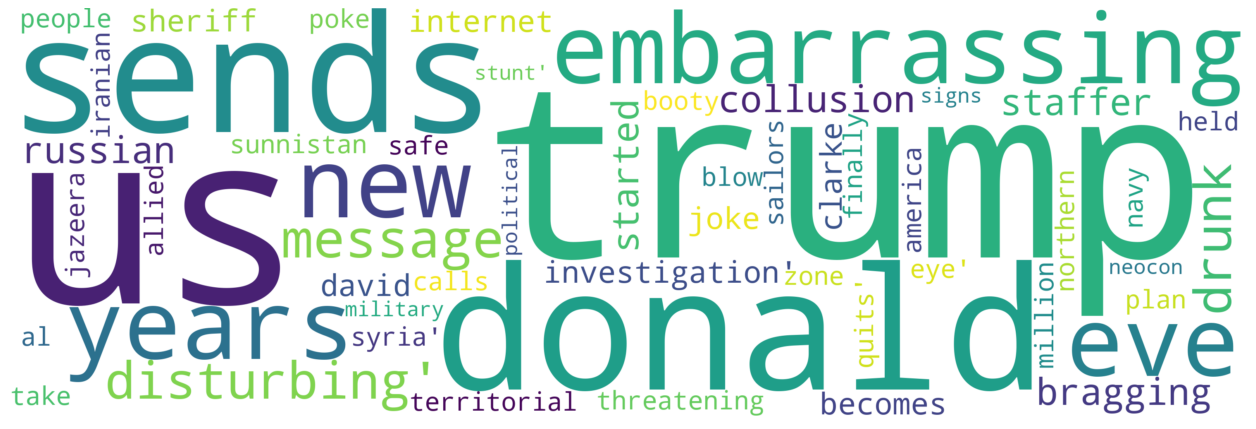

In [7]:
fake_titles_array = fake_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(fake_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

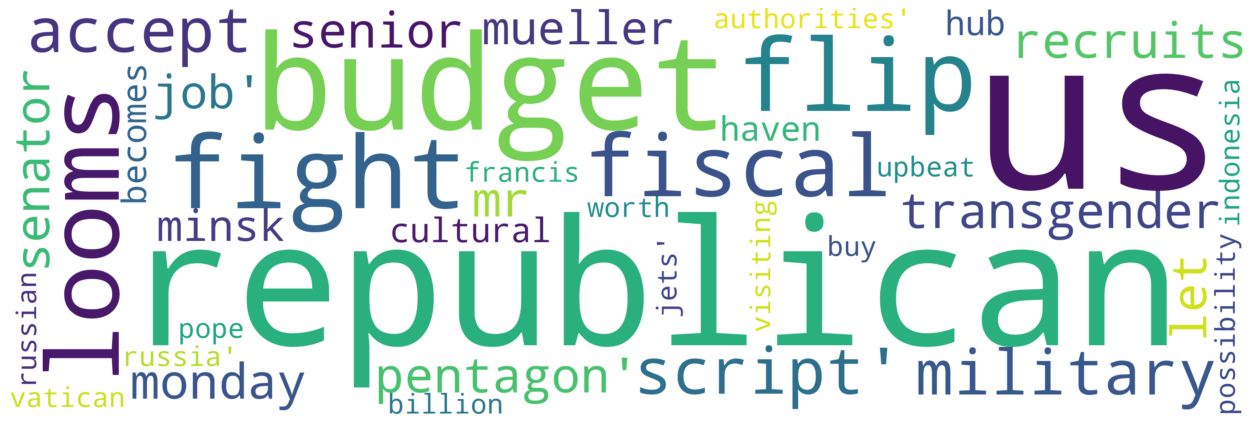

In [8]:
true_titles_array = true_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(true_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [9]:
fake_titles_strlen = fake_data['title'].str.len()
fake_titles_strlen.head()
fake_titles_average_chars = fake_titles_strlen.mean()

fake_texts_strlen = fake_data['text'].str.len()
fake_texts_strlen.head()
fake_texts_average_chars = fake_texts_strlen.mean()

true_titles_strlen = true_data['title'].str.len()
true_titles_strlen.head()
true_titles_average_chars = true_titles_strlen.mean()

true_texts_strlen = true_data['text'].str.len()
true_texts_strlen.head()
true_texts_average_chars = true_texts_strlen.mean()

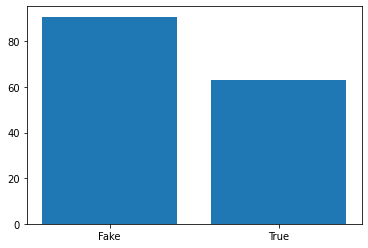

63.077601905028715


In [10]:
plt.bar(['Fake', 'True'],[fake_titles_average_chars, true_titles_average_chars])
plt.show()
print(true_titles_average_chars)

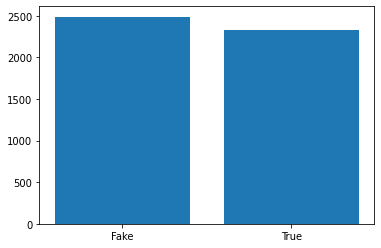

2324.2169771676704


In [11]:
plt.bar(['Fake', 'True'],[fake_texts_average_chars, true_texts_average_chars])
plt.show()
print(true_texts_average_chars)

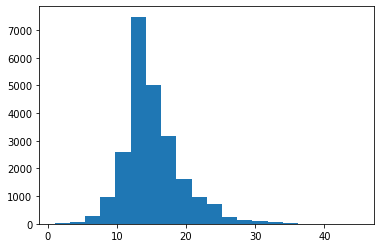

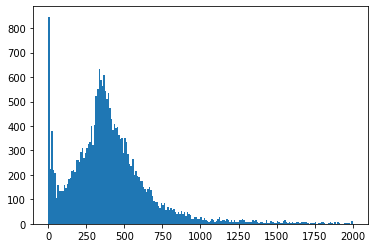

In [12]:
fake_titles_word_count = fake_data['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=20)
plt.show()

fake_text_word_count = fake_data['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=200, range=(0, 2000))
plt.show()

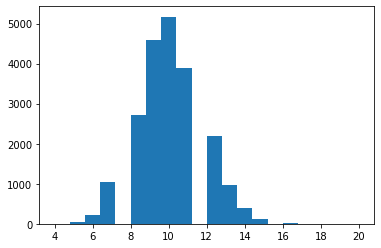

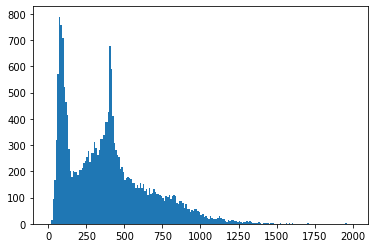

In [13]:
true_titles_word_count = true_data['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=20)
plt.show()

true_text_word_count = true_data['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=200, range=(0, 2000))
plt.show()

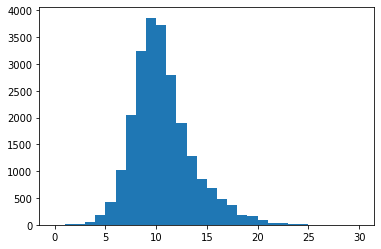

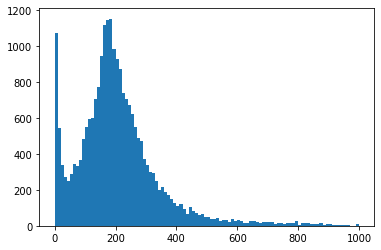

In [14]:
fake_data_no_stopwords = fake_data
fake_data_no_stopwords['title'] = fake_data_no_stopwords.title.apply(remove_stopwords)
fake_data_no_stopwords['text'] = fake_data_no_stopwords.text.apply(remove_stopwords)
fake_data_no_stopwords

fake_titles_word_count = fake_data_no_stopwords['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=30, range=(0,30))
plt.show()

fake_text_word_count = fake_data_no_stopwords['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=100, range=(0, 1000))
plt.show()

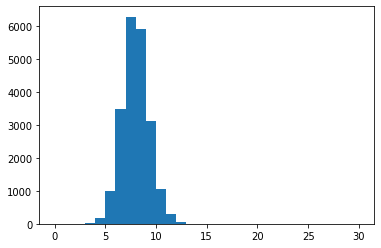

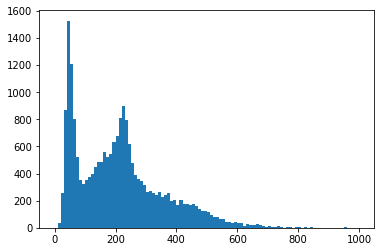

In [15]:
true_data_no_stopwords = true_data
true_data_no_stopwords['title'] = true_data_no_stopwords.title.apply(remove_stopwords)
true_data_no_stopwords['text'] = true_data_no_stopwords.text.apply(remove_stopwords)
true_data_no_stopwords

true_titles_word_count = true_data_no_stopwords['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=30, range=(0,30))
plt.show()

true_text_word_count = true_data_no_stopwords['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=100, range=(0, 1000))
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

def most_frequent_bigrams(series, n=20, min_words=2, max_words=2):
  series_corpus = series.tolist()

  series_vector = CountVectorizer(ngram_range = (min_words, max_words), binary = False, max_features = 10000, min_df =0.001)

  series_df = pd.DataFrame(series_vector.fit_transform(series_corpus).toarray())

  series_df_summed = series_df.sum(axis=0).sort_values(ascending=False)

  results = []

  for item in series_df_summed.index:
    results.append(series_vector.get_feature_names()[item])

  return results[:n]

In [54]:
most_frequent_bigrams(fake_data['title'])

['donald trump',
 'president trump',
 'hillary clinton',
 'white house',
 'fox news',
 'trump video',
 'bernie sanders',
 'boiler room',
 'ted cruz',
 'fake news',
 'trump supporters',
 'trump supporter',
 'supreme court',
 'lives matter',
 'black lives',
 'president obama',
 'room ep',
 'paul ryan',
 'watch trump',
 'kellyanne conway']

In [55]:
most_frequent_bigrams(true_data['title'])

['white house',
 'north korea',
 'trump says',
 'islamic state',
 'supreme court',
 'puerto rico',
 'travel ban',
 'factbox trump',
 'south korea',
 'trump administration',
 'says trump',
 'nuclear deal',
 'house speaker',
 'new york',
 'russia probe',
 'trump twitter',
 'foreign minister',
 'north korean',
 'attorney general',
 'saudi arabia']

In [56]:
most_frequent_bigrams(fake_data['text'])

['donald trump',
 'hillary clinton',
 'white house',
 'united states',
 'new york',
 'president obama',
 'president trump',
 'fox news',
 '21st century',
 'barack obama',
 'century wire',
 'fake news',
 'supreme court',
 'trump campaign',
 'trump realdonaldtrump',
 'obama administration',
 'national security',
 'social media',
 'law enforcement',
 'secretary state']

In [57]:
most_frequent_bigrams(true_data['text'])

['united states',
 'white house',
 'donald trump',
 'washington reuters',
 'president donald',
 'north korea',
 'new york',
 'prime minister',
 'said statement',
 'trump said',
 'told reuters',
 'islamic state',
 'told reporters',
 'president barack',
 'supreme court',
 'barack obama',
 'united nations',
 'house representatives',
 'secretary state',
 'hillary clinton']

In [99]:
from math import floor, ceil

fake_data['label'] = 0
true_data['label'] = 1
all_data = fake_data
all_data = all_data.append(true_data).reset_index(drop=True)

all_data = all_data.sample(frac=1).reset_index(drop=True)

def create_files(df, train_ratio, df_max_size= None):
  if(df_max_size is not None):
    df = df.head(df_max_size)
  train_size = int(train_ratio * (df.shape[0]-1))
  test_size = df.shape[0] - 1 - train_size
  #print(df.shape)
  train_data = df.head(train_size)
  #print(train_data.shape)
  test_data = df.tail(test_size)
  #print(testing_data.shape)
  train_data.to_csv('train.csv', index=False)
  test_data.to_csv('test.csv', index=False)

create_files(all_data, 0.75, 1000000)

In [102]:
test1 = pd.read_csv('train.csv')
test1.head(10)

,title,text,subject,date,label
0,planned parenthood shooter speaks sounds like ...,robert dear accused terrorist shot planned par...,news,"February 26, 2016",0
1,state election officials dark russian hacking,anaheim calif reuters federal government notif...,politicsnews,"August 25, 2017",1
2,dutch government 2 dead 43 wounded saint martin,amsterdam reuters dutch government friday rais...,worldnews,"September 8, 2017",1
3,factbox trump twitter sept 18 air force cia,following statements posted verified twitter a...,politicsnews,"September 18, 2017",1
4,washington post inciting violence fox news hos...,afternoon washington post wrote opinion articl...,politics,"Jul 10, 2017",0
5,breaking brother las vegas massacre suspect ar...,america seen crazy video las vegas mass shoote...,politics,"Oct 25, 2017",0
6,neil degrasse tyson went nuclear twitter trump...,astrophysicist neil degrasse tyson fan donald ...,news,"March 22, 2017",0
7,happy labor day 5 stunning facts obama family ...,happy labor day today day celebrate working am...,politics,"Sep 5, 2016",0
8,voting machines stolen controversial ga electi...,sandy springs ga april 18 reuters president do...,leftnews,"Apr 18, 2017",0
9,woman corners gop senator trapped flight deman...,republican senator tough position trapped flig...,news,"March 24, 2017",0
